# Microsoft Q# Coding Contest - Summer 2018 - Warmup Round
June 29 - July 2, 2018

In [1]:
import math
import numpy as np
import qiskit

## Utility functions

In [2]:
def get_statevector(qc):
    backend = qiskit.Aer.get_backend('statevector_simulator')
    result = qiskit.execute(qc, backend=backend).result()
    sv = result.get_statevector()
    return sv

def get_amplitudes(qc, threshold=1e-7):
    sv = get_statevector(qc)
    return {bin(i)[2:].zfill(qc.num_qubits): a for i, a in enumerate(sv) if np.abs(a) > threshold}

def get_probabilities(qc, threshold=1e-7):
    sv = get_statevector(qc)
    prob = np.real(sv*sv.conj())
    return {bin(i)[2:].zfill(qc.num_qubits): p for i, p in enumerate(prob) if p > threshold}

def get_counts(qc, shots=1000):
    backend = qiskit.Aer.get_backend('qasm_simulator')
    result = qiskit.execute(qc, backend=backend, shots=shots).result()
    counts = result.get_counts()
    return counts

## A. Generate plus state or minus state

You are given a qubit in state $|0\rangle$ and an integer sign.

Your task is to convert the given qubit to state 
$$|+\rangle = \frac{1}{\sqrt{2}}\left(|0\rangle + |1\rangle\right) \quad \text{if sign = 1},$$  or
$$|-\rangle = \frac{1}{\sqrt{2}}\left(|0\rangle - |1\rangle\right) \quad \text{if sign = -1}.$$

You have to implement an operation which takes a qubit and an integer as an input and has no output. The
"output" of your solution is the state in which it left the input qubit.

In [3]:
class GeneratePlusOrMinusState(qiskit.QuantumCircuit):
    def __init__(self, sign):
        self.sign = sign
        super().__init__(1, name='plus' if sign > 0 else 'minus')
        self._build()
    
    def _build(self):
        if self.sign < 0:
            self.x(0)
        self.h(0)    

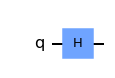

In [4]:
qc = GeneratePlusOrMinusState(1)
qc.draw('mpl')

In [5]:
get_statevector(qc)

array([0.70710678+0.j, 0.70710678+0.j])

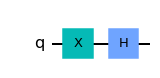

In [6]:
qc = GeneratePlusOrMinusState(-1)
qc.draw('mpl')

In [7]:
get_statevector(qc)

array([ 0.70710678-8.65956056e-17j, -0.70710678+8.65956056e-17j])

## B. Generate Bell state

You are given two qubits in state $|00\rangle$ and an integer *index*. Your task is to create one of the Bell states on them
according to the *index*:
* $|B_0\rangle = \frac{1}{\sqrt{2}}\left(|00\rangle + |11\rangle\right)$
* $|B_1\rangle = \frac{1}{\sqrt{2}}\left(|00\rangle - |11\rangle\right)$
* $|B_2\rangle = \frac{1}{\sqrt{2}}\left(|01\rangle + |10\rangle\right)$
* $|B_3\rangle = \frac{1}{\sqrt{2}}\left(|01\rangle - |10\rangle\right)$

In [8]:
class GenerateBellState(qiskit.QuantumCircuit):
    def __init__(self, index):
        self.index = index
        super().__init__(2, name='bell_state')
        self._build()
        
    def _build(self):
        self.h(0)
        self.cx(0, 1)
        if 1 & self.index:
            self.z(1)
        if 2 & self.index:
            self.x(0)

In [9]:
qc = GenerateBellState(0)
get_statevector(qc)

array([0.70710678+0.j, 0.        +0.j, 0.        +0.j, 0.70710678+0.j])

In [10]:
qc = GenerateBellState(1)
get_statevector(qc)

array([ 0.70710678+0.j,  0.        +0.j, -0.        +0.j, -0.70710678+0.j])

In [11]:
qc = GenerateBellState(2)
get_statevector(qc)

array([0.        +0.j, 0.70710678+0.j, 0.70710678+0.j, 0.        +0.j])

In [12]:
qc = GenerateBellState(3)
get_statevector(qc)

array([ 0.        +0.j,  0.70710678+0.j, -0.70710678+0.j, -0.        +0.j])

## C. Generate GHZ state

You are given $N$ qubits $(1 \le N \le 8)$ in zero state $|0\dots0\rangle$. Your task is to create Greenberger-Horne-Zeilinger (GHZ) state on them:

$$|\text{GHZ}\rangle =\frac{1}{\sqrt{2}}\left(|0\dots0\rangle + |1\dots1\rangle\right)$$

Note that for $N = 1$ and $N = 2$ GHZ state becomes states $|+\rangle$ and $|B_0\rangle$ from the previous tasks, respectively.

You have to implement an operation which takes an array of N qubits as an input and has no output. The "output"
of your solution is the state in which it left the input qubits.

In [13]:
class GenerateGHZState(qiskit.QuantumCircuit):
    def __init__(self, num_qubits):
        super().__init__(num_qubits, name='GHZ')
        self._build()
        
    def _build(self):
        self.h(0)
        for i in range(self.num_qubits-1):
            self.cx(0, i+1)

In [14]:
qc = GenerateGHZState(1)
get_statevector(qc)

array([0.70710678+0.j, 0.70710678+0.j])

In [15]:
qc = GenerateGHZState(2)
get_statevector(qc)

array([0.70710678+0.j, 0.        +0.j, 0.        +0.j, 0.70710678+0.j])

In [16]:
qc = GenerateGHZState(3)
get_statevector(qc)

array([0.70710678+0.j, 0.        +0.j, 0.        +0.j, 0.        +0.j,
       0.        +0.j, 0.        +0.j, 0.        +0.j, 0.70710678+0.j])

## D. Distinguish plus state and minus stat

You are given a qubit which is guaranteed to be either in $|+\rangle = \frac{1}{\sqrt{2}}\left(|0\rangle + |1\rangle\right)$  or in $|-\rangle = \frac{1}{\sqrt{2}}\left(|0\rangle - |1\rangle\right)$ state.

Your task is to perform necessary operations and measurements to figure out which state it was and to return 1 if
it was a $|+\rangle$ state or -1 if it was $|-\rangle$ state. The state of the qubit after the operations does not matter.

You have to implement an operation which takes a qubit as an input and returns an integer.

In [17]:
def check_plus_or_minus(qc):
    qc.h(0)
    qc.measure_all()
    state = next(iter(get_counts(qc, 1).keys()))
    return 1 if state == '0' else -1

In [18]:
qc = GeneratePlusOrMinusState(1)
check_plus_or_minus(qc)

1

In [19]:
qc = GeneratePlusOrMinusState(-1)
check_plus_or_minus(qc)

-1

## E. Distinguish Bell states

You are given two qubits which are guaranteed to be in one of the Bell states:
* $|B_0\rangle = \frac{1}{\sqrt{2}}\left(|00\rangle + |11\rangle\right)$
* $|B_1\rangle = \frac{1}{\sqrt{2}}\left(|00\rangle - |11\rangle\right)$
* $|B_2\rangle = \frac{1}{\sqrt{2}}\left(|01\rangle + |10\rangle\right)$
* $|B_3\rangle = \frac{1}{\sqrt{2}}\left(|01\rangle - |10\rangle\right)$

Your task is to perform necessary operations and measurements to figure out which state it was and to return the
index of that state (0 for $|B_0\rangle$, 1 for $|B_1\rangle$ etc.). The state of the qubits after the operations does not matter.

You have to implement an operation which takes an array of two qubits as an input and returns an integer.

In [20]:
def check_bell_states(qc):
    qc.cx(0, 1)
    qc.h(0)
    qc.measure_all()
    state = next(iter(get_counts(qc, 1).keys()))
    return int(state, base=2)

In [21]:
qc = GenerateBellState(0)
check_bell_states(qc)

0

In [22]:
qc = GenerateBellState(1)
check_bell_states(qc)

1

In [23]:
qc = GenerateBellState(2)
check_bell_states(qc)

2

In [24]:
qc = GenerateBellState(3)
check_bell_states(qc)

3

## F. Distinguish multi-qubit basis state

You are given $N$ qubits which are guaranteed to be in one of two basis states on $N$ qubits. You are also given two
bitstrings bits0 and bits1 which describe these basis states.
Your task is to perform necessary operations and measurements to figure out which state it was and to return 0 if
it was the state described with bits 0 or 1 if it was the state described with bits1. The state of the qubits after the
operations does not matter.

You have to implement an operation which takes the following inputs:
* an array of qubits qs,
* two arrays of boolean values bits0 and bits1, representing the basis states in which the qubits can be. These
arrays will have the same length as the array of qubits. bits0 and bits1 will differ in at least one position.

An array of boolean values represents a basis state as follows: the $i$-th element of the array is true if the $i$-th qubit
is in state $|1\rangle$, and false if it is in state $|0\rangle$. For example, array `[true; false]` describes 2-qubit state $|10\rangle$.

In [25]:
def check_multi_qubit_basis_state(qc, bits0, bits1):
    # get first different bit b/w bits0 and bits1
    first_diff = np.argmax(np.logical_xor(bits0, bits1))
    # measure first different bit in the quantum register
    creg = qiskit.ClassicalRegister(1, 'meas')
    qc.add_register(creg)
    qc.measure(qc.num_qubits-first_diff-1, 0)
    # get result
    state = next(iter(get_counts(qc, 1).keys()))
    return int((state == '1') ^ bool(bits0[first_diff]))

In [26]:
class GenerateBasisState(qiskit.QuantumCircuit):
    def __init__(self, state):
        self.state = state
        super().__init__(len(self.state), name='basis_state')
        self._build()
        
    def _build(self):
        for bit, qubit in zip(reversed(self.state), self.qubits):
            if bit:
                self.x(qubit)

In [27]:
state = [1, 0, 1, 0]
qc = GenerateBasisState(state)
get_probabilities(qc)

{'1010': 1.0}

In [28]:
bits0 = [1, 0, 1, 0]
bits1 = [0, 1, 1, 0]

qc = GenerateBasisState(bits1)

check_multi_qubit_basis_state(qc, bits0, bits1)

1

## G. Oracle for $f(x) = k$-th element of $x$

Implement a quantum oracle on $N$ qubits which implements a function $f(x) = x_k$, i.e. the value of the function is
the value of the $k$-th qubit.

You have to implement an operation which takes the following inputs:
* an array of qubits $x$ (input register),
* a qubit $y$ (output qubit),
* 0-based index of the qubit from input register $k \, \left(0 \le k < \text{Length}(x) \right)$.

The operation doesn't have an output; the "output" of your solution is the state in which it left the qubits.

In [29]:
class KthElementOracle(qiskit.QuantumCircuit):
    def __init__(self, num_qubits, k):
        self.k = k
        self.xreg = qiskit.QuantumRegister(num_qubits, name='x')  # input register
        self.yreg = qiskit.QuantumRegister(1, name='y')  # output qubit
        super().__init__(self.xreg, self.yreg, name='oracle')
        self._build()
        
    def _build(self):
        self.cx(self.xreg[self.k], self.yreg[0])  # equivalently: self.cx(k, self.num_qubits)

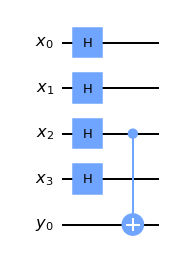

In [30]:
num_qubits = 4
k = 2

# initialize circuit with all equal superposition
xreg = qiskit.QuantumRegister(num_qubits, name='x')  # input register
yreg = qiskit.QuantumRegister(1, name='y')  # output qubit
qc = qiskit.QuantumCircuit(xreg, yreg)
qc.h(xreg)

# apply oracle
oracle = KthElementOracle(num_qubits, k)
qc.extend(oracle)

qc.draw('mpl')

In [31]:
def highlight(s):
    return '\x1b[1;43m{0}\x1b[0m'.format(s)

kk = num_qubits - k - 1
print('y%sx' % (' ' * (num_qubits//2)))
for state in get_probabilities(qc):
    x = state[1:]
    y = state[0]
    print('%s %s%s%s' % (highlight(y), x[:kk], highlight(x[kk]), x[kk+1:]))

y  x
0 0000
0 0001
0 0010
0 0011
0 1000
0 1001
0 1010
0 1011
1 0100
1 0101
1 0110
1 0111
1 1100
1 1101
1 1110
1 1111


## I. Deutsch-Jozsa algorithm

You are given a quantum oracle - an operation on $N + 1$ qubits which implements a function $f : \{0, 1\}^N \to \{0, 1\}$.

You are guaranteed that the function $f$ implemented by the oracle is either *constant* (returns 0 on all inputs or 1 on
all inputs) or *balanced* (returns 0 on exactly one half of the input domain and 1 on the other half).

There are only two possible constant functions: $f(x) = 0$ and $f(x) = 1$. The functions implemented by oracles in
the two previous problems ($f(x) = x_k$ and $f(x) = \sum_i x_i \mod 2$) are examples of balanced functions.

Your task is to figure out whether the function given by the oracle is constant. Your code is allowed to call the
given oracle only once.

You have to implement an operation which takes the following inputs:
* an integer $N$ - the number of qubits in the oracle input,
* an oracle $U_f$, implemented as an operation with signature `((Qubit[], Qubit) => ())`, i.e., an operation which
takes as input an array of qubits and an output qubit and has no output.

The return of your operation is a Boolean value: `true` if the oracle implements a constant function and `false`
otherwise.

In [32]:
class ConstantOracle(qiskit.QuantumCircuit):
    def __init__(self, num_qubits, output=0):
        self.output = output
        self.xreg = qiskit.QuantumRegister(num_qubits, name='x')  # input register
        self.yreg = qiskit.QuantumRegister(1, name='y')  # output qubit
        super().__init__(self.xreg, self.yreg, name='oracle')
        self._build()
        
    def _build(self):
        if self.output:
            self.x(self.yreg[0])  # equivalently: self.x(self.num_qubits)


class BalancedOracle(KthElementOracle):
    def __init__(self, num_qubits, k=0):
        super().__init__(num_qubits, k)

In [33]:
def deutsch_jozsa(oracle):
    num_qubits = oracle.num_qubits-1
    # initialize circuit with all equal superposition in x
    xreg = qiskit.QuantumRegister(num_qubits, name='x')  # input register
    yreg = qiskit.QuantumRegister(1, name='y')  # output qubit
    qc = qiskit.QuantumCircuit(xreg, yreg)
    qc.h(xreg)
    
    # y -> |->
    qc.x(yreg)
    qc.h(yreg)
    
    # apply oracle
    qc.extend(oracle)
    
    # apply inverse of Hadamard transform on x
    qc.h(xreg)
    
    # measure x
    creg = qiskit.ClassicalRegister(num_qubits, 'meas')
    qc.add_register(creg)
    qc.measure(xreg, creg)
    
    # sample result
    return '0'*num_qubits in get_counts(qc)

In [34]:
num_qubits = 3
oracle = ConstantOracle(num_qubits)
deutsch_jozsa(oracle)

True

In [35]:
num_qubits = 3
oracle = BalancedOracle(num_qubits)
deutsch_jozsa(oracle)

False

In [36]:
import qiskit.tools.jupyter
%qiskit_version_table